In [4]:
import pandas as pd

In [5]:
subreddit_names = ["suicide", "depression"]
years = [2020, 2023, 2024]
core_or_random_list = ['core', 'random']

all_value_counts_df = pd.DataFrame()

for subreddit_name in subreddit_names:
    for year in years:
        for core_or_random in core_or_random_list:
            file_path = f'transformer_results/{subreddit_name}_{core_or_random}_submitters_replied_{year}_sentiment_score_transformer.csv'
            df = pd.read_csv(file_path, dtype='str', encoding='utf-8', lineterminator='\n')

            value_counts = df['sentiment_tracking_category'].value_counts()

            value_counts_df = value_counts.reset_index()
            value_counts_df.columns = ['sentiment_tracking_category', 'count']

            value_counts_df['year'] = year
            value_counts_df['subreddit_name'] = subreddit_name
            value_counts_df['core_or_random'] = core_or_random
            value_counts_df = value_counts_df[['year', 'subreddit_name', 'core_or_random', 'sentiment_tracking_category', 'count']]
            all_value_counts_df = pd.concat([all_value_counts_df, value_counts_df], ignore_index=True)

all_value_counts_df.to_csv('combined_sentiment_tracking_category_counts.csv', index=False, encoding='utf-8')

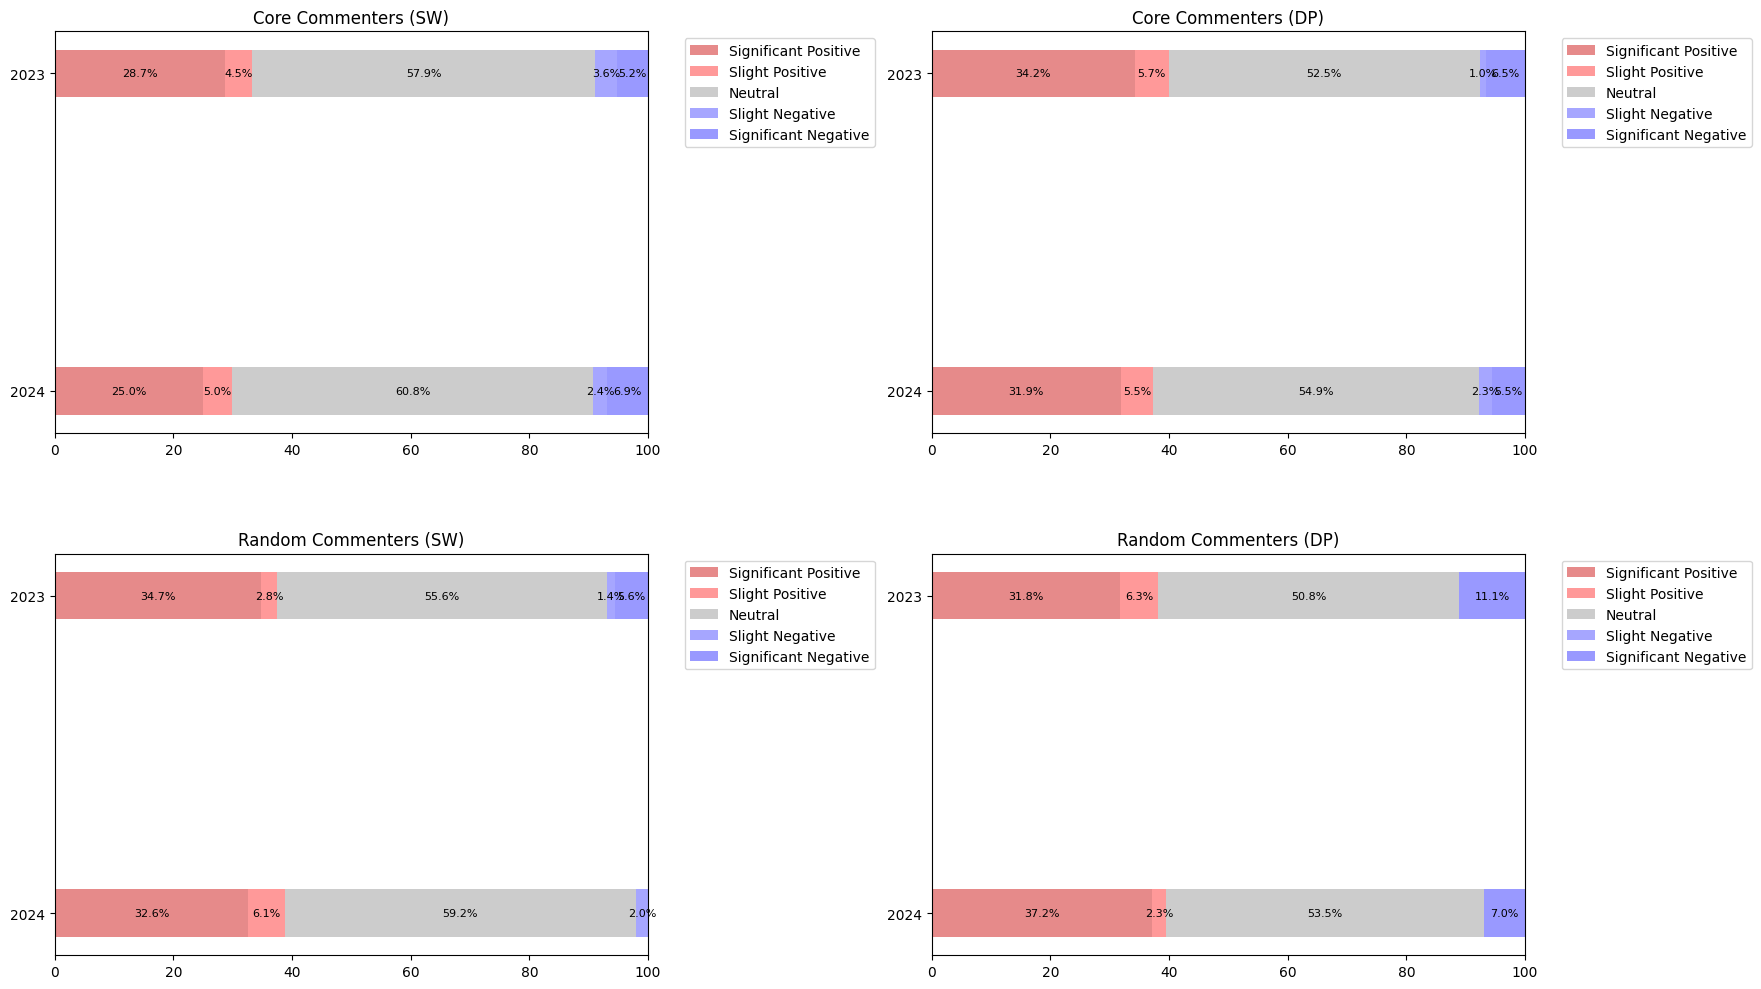

In [11]:
import matplotlib.pyplot as plt
import numpy as np

years = ['2024', '2023']
categories = ['Significant Positive', 'Slight Positive', 'Neutral', 'Slight Negative', 'Significant Negative']
colors = ['#E68A8A', '#FF9999', '#CCCCCC', '#A6A6FF', '#9999FF']

# Core Commenters (SW)
core_sw = [
    [24.96, 4.99, 60.75, 2.41, 6.88],  # 2023
    [28.70, 4.51, 57.94, 3.61, 5.23]   # 2024
]

# Core Commenters (DP)
core_dp = [
    [31.86, 5.45, 54.89, 2.26, 5.54],  # 2023
    [34.25, 5.68, 52.50, 1.03, 6.54]   # 2024
]

# Random Commenters (SW)
random_sw = [
    [32.65, 6.12, 59.18, 2.04, 0.00],  # 2023
    [34.72, 2.78, 55.56, 1.39, 5.56]   # 2024
]

# Random Commenters (DP)
random_dp = [
    [37.21, 2.33, 53.49, 0.00, 6.98],  # 2023
    [31.75, 6.35, 50.79, 0.00, 11.11]  # 2024
]

def plot_horizontal_stacked_bar(ax, data, title):
    left = np.zeros(len(years))
    bar_height = 0.15
    for i, category in enumerate(categories):
        values = [row[i] for row in data]
        ax.barh(years, values, left=left, height=bar_height, label=category, color=colors[i])
        for j, value in enumerate(values):
            if value > 0:  # Only show text if value is nonzero
                ax.text(left[j] + value / 2, j, f'{value:.1f}%', va='center', ha='center', fontsize=8, color='black')
        left += values
    ax.set_title(title)
    ax.set_xlim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

fig, axs = plt.subplots(2, 2, figsize=(18, 10))

plot_horizontal_stacked_bar(axs[0, 0], core_sw, 'Core Commenters (SW)')
plot_horizontal_stacked_bar(axs[0, 1], core_dp, 'Core Commenters (DP)')
plot_horizontal_stacked_bar(axs[1, 0], random_sw, 'Random Commenters (SW)')
plot_horizontal_stacked_bar(axs[1, 1], random_dp, 'Random Commenters (DP)')

plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.3)
output_file = 'stacked_bar_charts.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
